In [3]:
#https://www.gutenberg.org/

#Bring in text file 
file_path = "great_expectations.txt"
textfile = open(file_path, "r", encoding="utf-8") #r => read the file

great_expect = textfile.read()
print(great_expect)

The Project Gutenberg eBook of Great Expectations, by Charles Dickens

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Great Expectations

Author: Charles Dickens

Release Date: July, 1998 [eBook #1400]
[Most recently updated: April 27, 2020]

Language: English

Character set encoding: UTF-8

Produced by: An Anonymous Volunteer and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***

[Illustration]




Great Expectations

[1867 Edition]

by Charles Dickens


Contents

 Chapter I.
 Chapter II.
 Chapter III.
 Chapter IV.
 Chapter V.
 Chapter VI.
 Chapter VII.
 Chapte

In [4]:
#https://github.com/piskvorky/gensim
#gensim depends on NumPy and Scipy, two Python packages for scientific computing. 
#You must have them installed prior to installing gensim.
%pip install gensim
#Installing gensim=4.3.1 fails with python=3.12.1
#https://github.com/piskvorky/gensim/issues/3510
#We don't build wheels for Python 3.12 yet. This is why your pip install is attempting to build a wheel. 
#It's failing because you appear to be missing a compiler

#https://www.nltk.org/
%pip install nltk
%pip install wordcloud

import pandas as pd
from PIL import Image
import numpy as np
import random 
import re
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#nltk package and its sub-packages => heavily used for NLP (natural language processing) to analyze text data
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

In [6]:
# #gensim package => used for topic modeling
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

In [7]:
# https://www.nltk.org/nltk_data/
nltk.download("punkt")
nltk.download("stopwords") 
nltk.download("vader_lexicon")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ukg11250\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ukg11250\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ukg11250\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ukg11250\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#Cleaning to visualize our popular words
#Lowercase words
word_cloud_text = great_expect.lower()

#remove unwanted characters that might clutter the visualizations
word_cloud_text = re.sub('[^a-zA-Z0-09]', " ", word_cloud_text) #any character that matches the pattern [^a-zA-Z0-09] will be replaced with a space.

In [9]:
#Tokenize the data to split it into words
tokens = word_tokenize(word_cloud_text) #split up out text data into individual words

#Remove stopwords (examples of stop words in English are “a,” “the,” “is,” “are,” etc.)
tokens = (word for word in tokens if word not in stopwords.words("english")) #.words() module retrieves a list of common English stopwords.

#Remove short words less than 3 letters in length
tokens = (word for word in tokens if len(word) >= 3)

In [10]:
#Take alphabets, prefixes, suffixes, starters, acronyms, websites and digits to determine what makes the end of a sentence
#Data cleaning to split data into sentences
alphabets= "([A-Za-z])" #Matches any alphabet character.
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)" #Matches common sentence starters
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)" #Matches acronyms in the form of "A.B.C." or "A.B.".
websites = "[.](com|net|org|io|gov|edu|me)" #Matches common website domain extensions
digits = "([0-9])" #Matches any digit.

#The input text, great_expect, is prepared for processing by adding spaces at the beginning and end and replacing newline characters with spaces.
text = " " + great_expect + "  "
text = text.replace("\n"," ")
#Uisng REGEX to perform various substitution operations 
text = re.sub(prefixes,"\\1<prd>",text) #Replace prefixes with <prd> to mark them.
text = re.sub(websites,"<prd>\\1",text) #Replace website domain extensions with <prd> followed by the extension.
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text) #Replace digits followed by a dot and another digit with the digits separated by <prd>.
if "..." in text: text = text.replace("...","<prd><prd><prd>") #If the input text contains multiple consecutive ellipses ("..."), the code replaces them with three periods ("<prd><prd><prd>").
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>") #Replace "Ph.D." with "Ph<prd>D<prd>".
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text) #Replaces patterns like " A. " or " B. " with " A<prd> " or " B<prd> "
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text) #Substitutes occurrences of acronyms followed by starters with a marker "<stop>" placed between them => ensures that acronyms followed by starters (e.g., "U.S. President") are not mistakenly treated as sentence endings.
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text) #Replaces patterns like "A.B.C." or "X.Y.Z." with "A<prd>B<prd>C<prd>" or "X<prd>Y<prd>Z<prd>", respectively.
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text) #Handles acronyms with two periods by replacing them with "<prd>" between each alphabet.
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text) #It ensures that suffixes followed by starters are marked as sentence endings.
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text) #It handles suffixes without starters by replacing them with "<prd>".
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text) #Replaces patterns like " A." with " A<prd>".

#handle specific punctuation marks like quotation marks, exclamation marks, and question marks, ensuring they are followed by "<stop>" to mark the end of a sentence.
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>") 
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")

text = text.replace("<prd>",".") #Replaces all occurrences of "<prd>" with a period character.
sentences = text.split("<stop>") #Splits the text into sentences using the "<stop>" marker as the delimiter.

#save the result into a pd data frame
sentences = [s.strip() for s in sentences]
sentences = pd.DataFrame(sentences)
sentences.columns = ['sentence']

In [11]:
#Print out sentences variable
print('Number of sentences: ', len(sentences))
print(sentences.head(20))

Number of sentences:  10038
                                             sentence
0   ﻿The Project Gutenberg eBook of Great Expectat...
1   You may copy it, give it away or re-use it und...
2                                      gutenberg.org.
3   If you are not located in the United States, y...
4   Title: Great Expectations  Author: Charles Dic...
5                                        Chapter III.
6                                         Chapter IV.
7                             Chapter V.  Chapter VI.
8                                        Chapter VII.
9                                       Chapter VIII.
10                                        Chapter IX.
11                            Chapter X.  Chapter XI.
12                                       Chapter XII.
13                                      Chapter XIII.
14                                       Chapter XIV.
15                                        Chapter XV.
16                                       Chapter XVI.


In [12]:
# Remove the first few rows of text that are irrelevant for analysis
sentences.drop(sentences.index[:59], inplace=True)
sentences = sentences.reset_index(drop=True)
sentences.head(10)

,sentence
0,[Illustration] Chapter I. My father’s fa...
1,"So, I called myself Pip, and came to be called..."
2,"I give Pirrip as my father’s family name, on t..."
3,"As I never saw my father or my mother, and nev..."
4,"The shape of the letters on my father’s, gave ..."
5,From the character and turn of the inscription...
6,"To five little stone lozenges, each about a fo..."
7,"Ours was the marsh country, down by the river,..."
8,My first most vivid and broad impression of th...
9,At such a time I found out for certain that th...


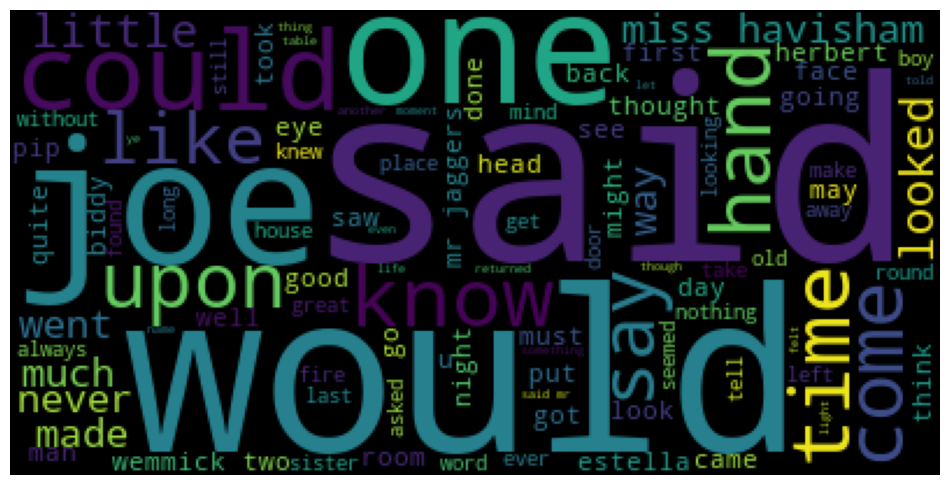

In [13]:
#Create word cloud with our text data
stopwords_wc = set(stopwords.words("english"))

wordcloud = WordCloud(max_words=100, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
#image_path = "man_in_top_hat.jpeg"
image_path = "img2.jpg"
mask = np.array(Image.open(image_path)) #np.array() function from NumPy is used to convert the Image object into a NumPy array.

#Define function to provide gray color skin to our word cloud
#**kwargs => special syntax that allows the function to accept any number of additional keyword arguments. It collects any additional keyword arguments into a dictionary named kwargs.
def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    #generates a string representing a color in HSL (Hue, Saturation, Lightness) format.
    #the % symbol here is used for string interpolation, allowing the insertion of dynamically generated values into a string template.
    return "hsl(0, 0%%, %d%%)" % random.randint(60,100) #%d is a placeholder for a decimal integer value (the lightness parameter)

In [15]:
def yellow_shade_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set a constant hue value for yellow
    hue = 50  # Hue value for yellow
    
    # Generate a random saturation value within a range (e.g., 50% to 100%)
    saturation = random.randint(50, 100)
    
    # Generate a random lightness value within a range (e.g., 50% to 90%)
    lightness = random.randint(50, 90)
    
    # Return the HSL color format string with the specified hue, saturation, and lightness
    return "hsl({}, {}%, {}%)".format(hue, saturation, lightness)


def yellow_to_orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set a random hue value within the range of yellow to orange
    hue = random.randint(30, 45)  # Adjust the hue range to your preference
    
    # Return the HSL color format string with the specified hue and constant saturation/lightness
    return "hsl({}, 99%, 50%)".format(hue)


def orange_to_white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set a constant hue value within the range of orange
    hue = 30  # Hue value for orange
    
    # Generate a random saturation value within a range (e.g., 50% to 100%)
    saturation = random.randint(50, 100)
    
    # Generate a random lightness value within a range (e.g., 50% to 100%)
    lightness = random.randint(50, 100)
    
    # Return the HSL color format string with the specified hue, saturation, and lightness
    return "hsl({}, {}%, {}%)".format(hue, saturation, lightness)

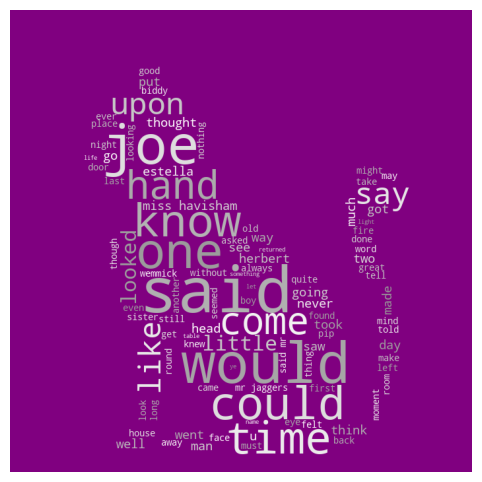

In [16]:
wordcloud = WordCloud(background_color="purple", max_words=100, mask=mask, color_func=gray_color_func, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
#ANALYZE WORD FREQUENCY
#Create word frequency distribution
fdist = nltk.FreqDist(tokens) #The FreqDist class computes the frequency distribution of the tokens, which means it counts the occurrences of each unique token in the list.
fdist

FreqDist({'said': 1349, 'joe': 747, 'would': 599, 'one': 514, 'could': 484, 'know': 392, 'miss': 383, 'come': 375, 'time': 374, 'little': 371, ...})

In [18]:
#View the 50 most common words in the text
fdist.most_common(50)

[('said', 1349),
 ('joe', 747),
 ('would', 599),
 ('one', 514),
 ('could', 484),
 ('know', 392),
 ('miss', 383),
 ('come', 375),
 ('time', 374),
 ('little', 371),
 ('upon', 368),
 ('pip', 341),
 ('like', 327),
 ('looked', 325),
 ('man', 321),
 ('havisham', 318),
 ('never', 315),
 ('old', 314),
 ('herbert', 313),
 ('much', 312),
 ('well', 304),
 ('say', 301),
 ('made', 300),
 ('went', 290),
 ('wemmick', 284),
 ('way', 278),
 ('see', 277),
 ('hand', 270),
 ('estella', 270),
 ('good', 257),
 ('two', 255),
 ('saw', 250),
 ('put', 246),
 ('back', 244),
 ('took', 243),
 ('jaggers', 242),
 ('think', 241),
 ('going', 241),
 ('got', 238),
 ('thought', 238),
 ('came', 235),
 ('head', 232),
 ('biddy', 231),
 ('might', 228),
 ('boy', 220),
 ('day', 219),
 ('night', 213),
 ('done', 212),
 ('dear', 209),
 ('must', 208)]

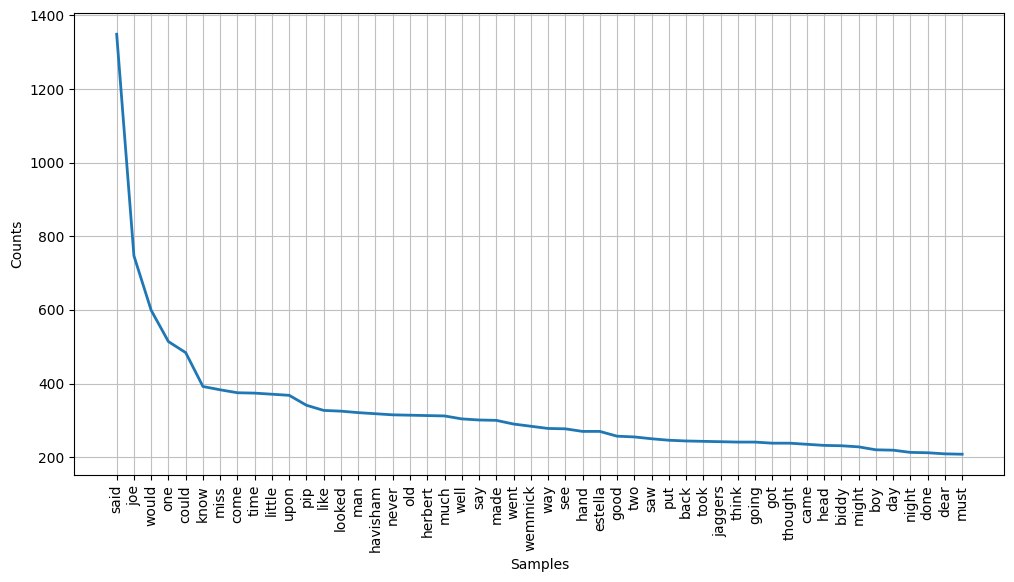

In [19]:
#Visualization of top 50 most common words in text
plt.figure(figsize=(12,6))
fdist.plot(50)
plt.show()

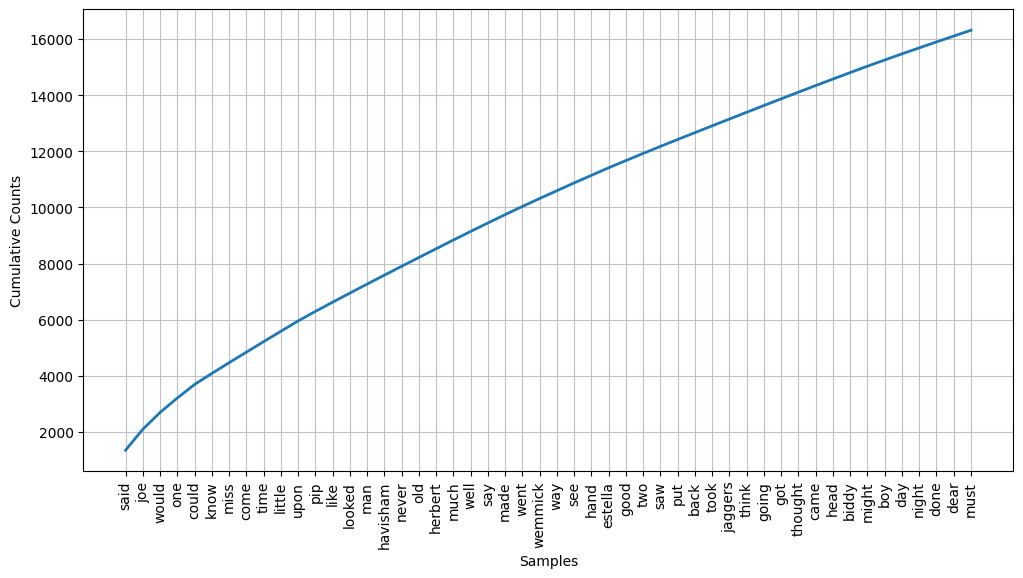

In [20]:
#Visualization of top 50 most common words in text cumulatively
plt.figure(figsize=(12,6))
fdist.plot(50, cumulative=True)
plt.show()

In [21]:
#PERFORM VADER SENTIMENT ANALYSIS
# https://github.com/cjhutto/vaderSentiment
# https://vadersentiment.readthedocs.io/en/latest/index.html

#Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Perform Vader sentiment analysis
sentences['compound'] = [analyzer.polarity_scores(x)['compound'] for x in sentences['sentence']] #composite sentiment score ranging from -1 (most negative) to 1 (most positive).
sentences['neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentences['sentence']] #negative score
sentences['neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentences['sentence']] #neutral score
sentences['pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentences['sentence']] #positive score

sentences.head(10)

,sentence,compound,neg,neu,pos
0,[Illustration] Chapter I. My father’s fa...,0.0000,0.000,1.000,0.000
1,"So, I called myself Pip, and came to be called...",0.0000,0.000,1.000,0.000
2,"I give Pirrip as my father’s family name, on t...",0.0772,0.000,0.942,0.058
3,"As I never saw my father or my mother, and nev...",0.3612,0.000,0.941,0.059
4,"The shape of the letters on my father’s, gave ...",-0.1531,0.088,0.846,0.065
5,From the character and turn of the inscription...,-0.2960,0.087,0.913,0.000
6,"To five little stone lozenges, each about a fo...",0.4404,0.047,0.883,0.070
7,"Ours was the marsh country, down by the river,...",0.0000,0.000,1.000,0.000
8,My first most vivid and broad impression of th...,0.5423,0.000,0.836,0.164
9,At such a time I found out for certain that th...,-0.9325,0.124,0.848,0.028


In [31]:
#Get number of positive, neutral, negative sentences
# .loc is used to select rows from a DataFrame based on a condition applied to a specific column label.
# sentences['compound'] => selects the column labeled 'compound' from the DataFrame sentences.
positive_sentence = sentences.loc[sentences['compound'] > 0]
negative_sentence = sentences.loc[sentences['compound'] < 0]
neutral_sentence = sentences.loc[sentences['compound'] == 0]

print(sentences.shape) #prints the shape of the original DataFrame sentences, which represents the number of rows and columns.
print('Number of positive sentences:', len(positive_sentence))
print('Number of negative sentences:', len(negative_sentence))
print('Number of neutral sentences:', len(neutral_sentence))

(9979, 5)
Number of positive sentences: 3232
Number of negative sentences: 2452
Number of neutral sentences: 4295


(array([  19.,   27.,   40.,   43.,   60.,   70.,   74.,   95.,  108.,
          74.,   79.,  143.,  141.,  107.,  129.,  144.,  144.,  236.,
          90.,  141.,   75.,  205.,  117.,   54., 4333.,   67.,  110.,
          63.,  102.,   83.,  105.,  158.,   56.,  179.,  259.,  212.,
         249.,  243.,  157.,  139.,  133.,  158.,  132.,  147.,  129.,
         115.,   97.,   73.,   47.,   18.]),
 array([-0.976   , -0.936914, -0.897828, -0.858742, -0.819656, -0.78057 ,
        -0.741484, -0.702398, -0.663312, -0.624226, -0.58514 , -0.546054,
        -0.506968, -0.467882, -0.428796, -0.38971 , -0.350624, -0.311538,
        -0.272452, -0.233366, -0.19428 , -0.155194, -0.116108, -0.077022,
        -0.037936,  0.00115 ,  0.040236,  0.079322,  0.118408,  0.157494,
         0.19658 ,  0.235666,  0.274752,  0.313838,  0.352924,  0.39201 ,
         0.431096,  0.470182,  0.509268,  0.548354,  0.58744 ,  0.626526,
         0.665612,  0.704698,  0.743784,  0.78287 ,  0.821956,  0.861042,
        

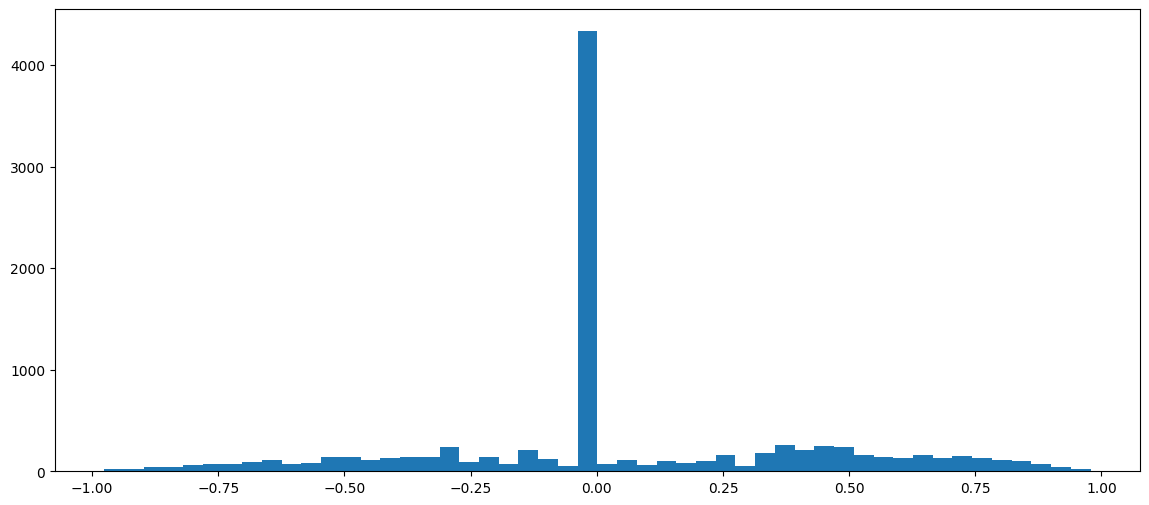

In [23]:
# Visualize Vader sentiment results
plt.figure(figsize=(14,6))
#"bins" refer to the intervals or ranges into which the data is divided for analysis and visualization
plt.hist(sentences['compound'], bins=50) #histogram plot

In [24]:
#PERFORM TOPIC MODELING
#Convert sentence data to list
data = sentences['sentence'].values.tolist()
type(data) #check if data is a list

list

In [25]:
#Text cleaning and tokenization using function
def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize and lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts

In [26]:
#Apply function to process data and convert to dictionary
data = text_processing(data)
dictionary = Dictionary(data)
len(dictionary)

9740

In [27]:
#Create corpus for LDA analysis
corpus = [dictionary.doc2bow(text) for text in data] #.doc2bow method is going to take our text and make sure each word is tokenized and normalized
len(corpus)

9979

-4.984662897641509
-5.250375826175895
-5.800019607177095
-6.505412042269931
-7.372759540523293
-7.921236444019666
-8.088976361449095


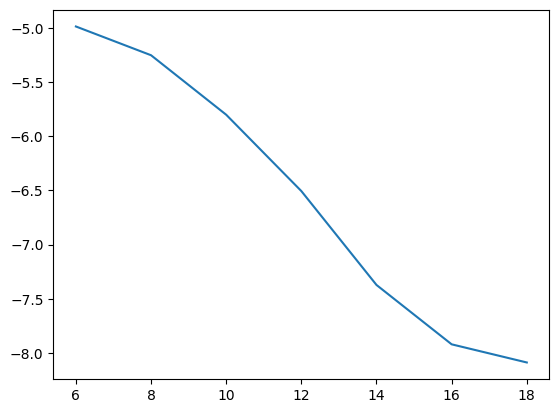

In [29]:
#Find optimal k value for the number of topics for our LDA analysis (determine what topics are popular in a set of text)
np.random.seed(1)
k_range = range(6,20,2) #ranging from 6 to 18, going every 2.
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=LdaModel, corpus=corpus, dictionary=dictionary, coherence="u_mass")
    print(cm.get_coherence())
    scores.append(cm.get_coherence())

plt.figure()
#on the x axis => number of topics we're looking at
#on the y axis => the coherence value
plt.plot(k_range, scores)

In [30]:
#Build LDA topic model
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, passes=20)

#Print topic distribution
model.show_topics()

[(0,
  '0.023*"miss" + 0.022*"joe" + 0.021*"pip" + 0.019*"havisham" + 0.019*"said" + 0.017*"come" + 0.013*"good" + 0.013*"old" + 0.011*"tell" + 0.009*"man"'),
 (1,
  '0.009*"time" + 0.008*"face" + 0.007*"little" + 0.007*"two" + 0.007*"looked" + 0.006*"could" + 0.006*"one" + 0.006*"saw" + 0.005*"old" + 0.005*"never"'),
 (2,
  '0.017*"yes" + 0.013*"gutenberg" + 0.011*"project" + 0.009*"one" + 0.008*"sir" + 0.006*"london" + 0.006*"hand" + 0.006*"jagger" + 0.006*"wemmick" + 0.006*"understand"'),
 (3,
  '0.015*"well" + 0.015*"would" + 0.012*"could" + 0.011*"said" + 0.010*"think" + 0.010*"done" + 0.010*"joe" + 0.007*"ever" + 0.007*"might" + 0.007*"must"'),
 (4,
  '0.046*"said" + 0.017*"know" + 0.014*"wemmick" + 0.013*"dear" + 0.012*"herbert" + 0.012*"would" + 0.011*"jagger" + 0.010*"say" + 0.010*"estella" + 0.010*"look"'),
 (5,
  '0.014*"hand" + 0.011*"work" + 0.009*"took" + 0.009*"went" + 0.008*"table" + 0.008*"upon" + 0.008*"little" + 0.007*"room" + 0.007*"put" + 0.006*"round"')]